In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
bank = pd.read_csv('D:\\24 - Machine_Learning\\download files\\bank\\bank.csv')
bank

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [3]:
bank.shape

(4521, 1)

In [4]:
bank = pd.read_csv('D:\\24 - Machine_Learning\\download files\\bank\\bank.csv', sep=';')

In [5]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
bank.shape

(4521, 17)

In [7]:
bank.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

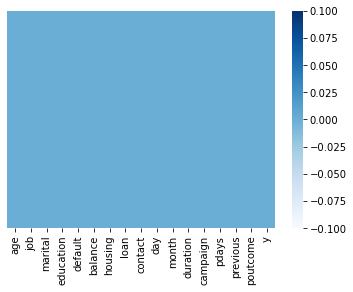

In [8]:
sns.heatmap(bank.isnull(), yticklabels=False, cbar=True, cmap='Blues')

In [9]:
corr = bank.corr()

<AxesSubplot:>

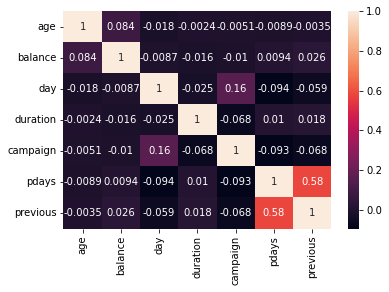

In [10]:
sns.heatmap(corr, annot = True)

In [11]:
# pdays and previous features are highly correlated with the value 0.58
# day and campaign features are highly correlated with the value 0.16

In [12]:
# IDENTIFY the Numeric, Categorical & Nominal Features
# Numeric :  age, balance, day, duration, campaign and pdays
# Categorical : 
# Ordinal :  poutcome, default, housing, loan
# Nominal : job, marital, education, contact, month

{'whiskers': [<matplotlib.lines.Line2D at 0x2271411e940>,
 'caps': [<matplotlib.lines.Line2D at 0x2271411efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2271411e640>],
 'medians': [<matplotlib.lines.Line2D at 0x227141314c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22714131790>],
 'means': []}

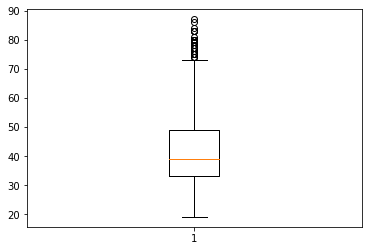

In [13]:
plt.boxplot(bank['age'])

In [14]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [15]:
bank['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

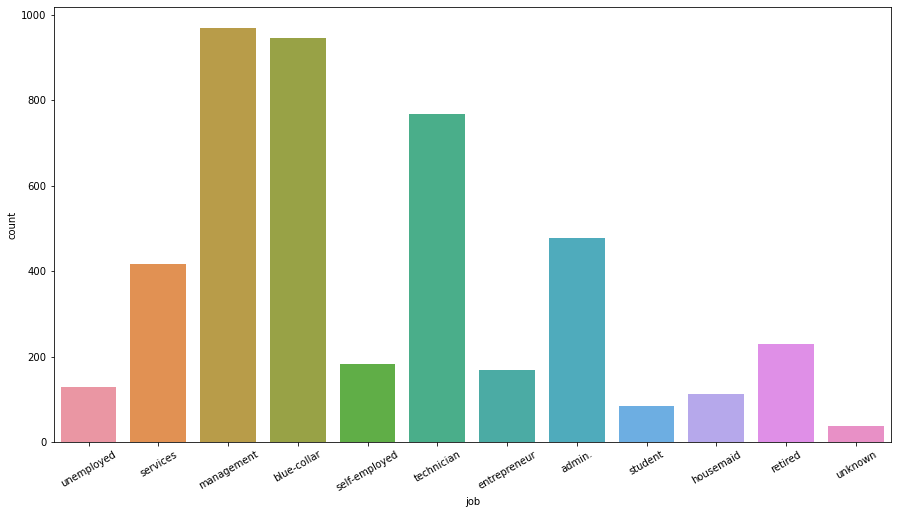

In [16]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='job', data=bank)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

In [17]:
# Maximum unqiue data of job is from: management, blue-collar and technician

In [18]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

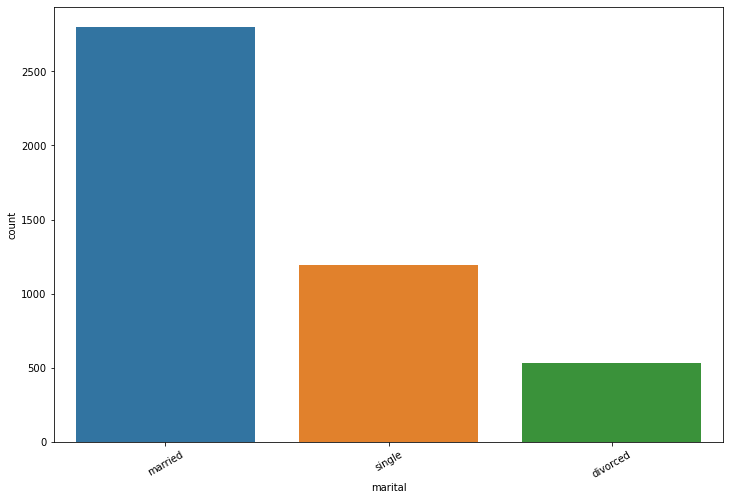

In [19]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='marital', data=bank)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

In [20]:
# Maximum unique data of marital is from: Married

In [21]:
bank['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

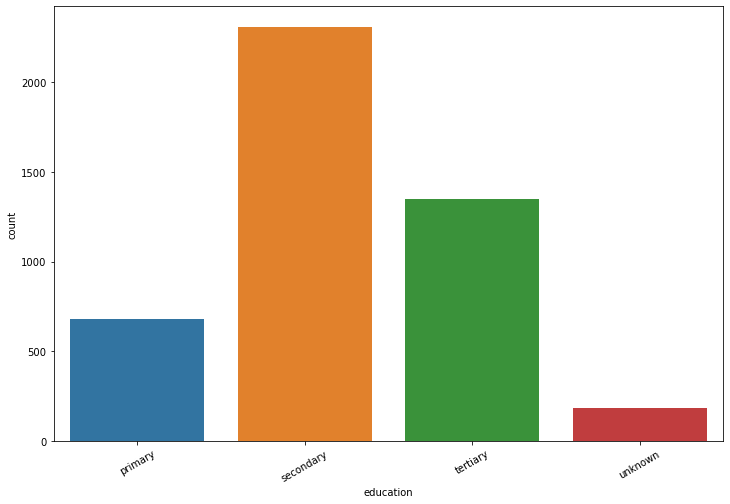

In [22]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='education', data=bank)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

In [23]:
# Maximum unique data of education is from: Secondary

In [24]:
bank['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

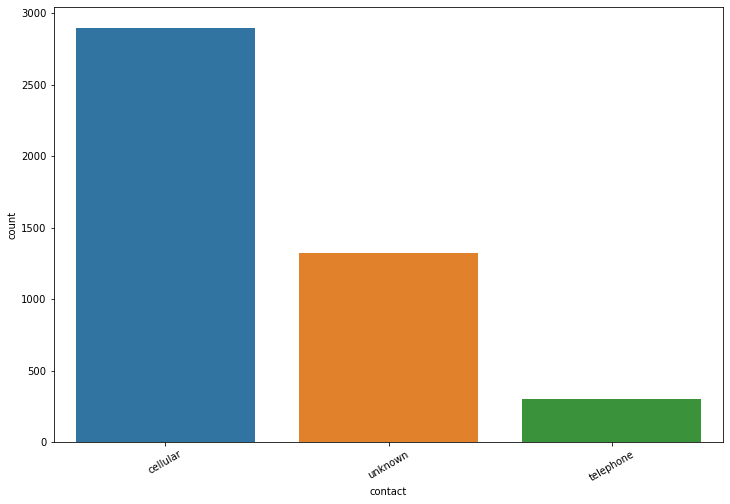

In [25]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='contact', data=bank)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

In [26]:
# Maximum unique data of contact is from: Cellular

In [27]:
bank['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

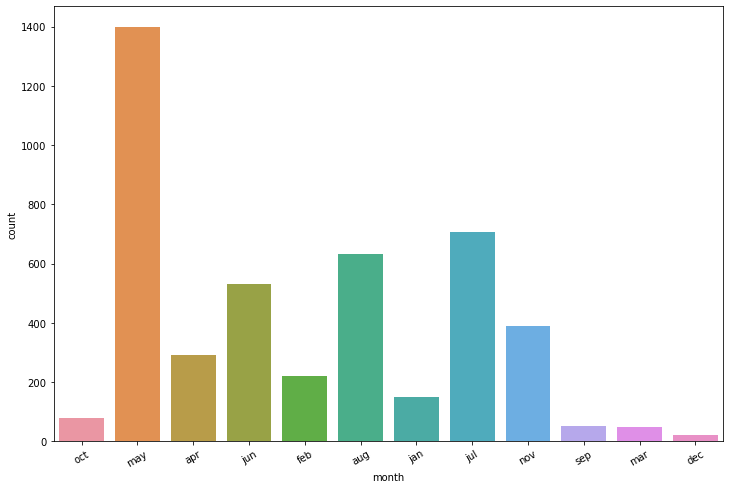

In [28]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='month', data=bank)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

In [29]:
# Maximum unique data of motnh is from: May

In [30]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

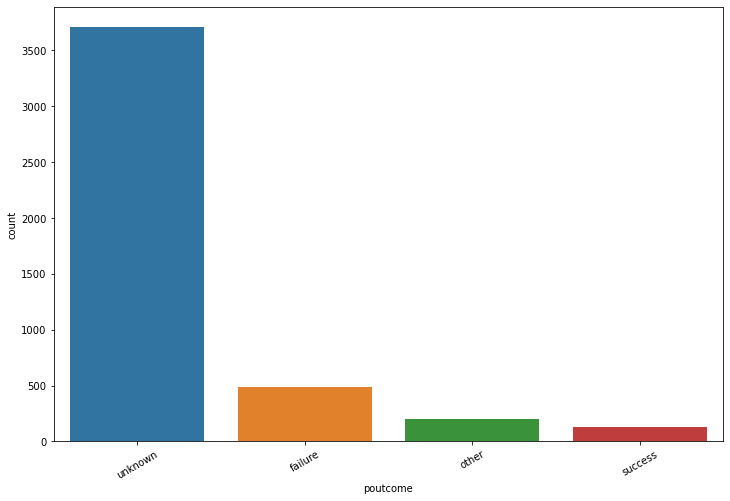

In [31]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='poutcome', data=bank)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

In [32]:
# Maximum unique data of poutcome is from: Unknown

In [33]:
bank['poutcome'] = bank['poutcome'].map({'failure' : -1, 'unknown' : 0, 'success' : 1, 'other' : 0})

In [34]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [35]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
bank['housing'].unique()

array(['no', 'yes'], dtype=object)

In [37]:
bank['default'] = bank['default'].map({'yes': 0, 'no':1})
bank['housing'] = bank['housing'].map({'yes': 0, 'no':1})
bank['loan'] = bank['loan'].map({'yes': 0, 'no':1})

In [38]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,oct,79,1,-1,0,0,no
1,33,services,married,secondary,1,4789,0,0,cellular,11,may,220,1,339,4,-1,no
2,35,management,single,tertiary,1,1350,0,1,cellular,16,apr,185,1,330,1,-1,no
3,30,management,married,tertiary,1,1476,0,0,unknown,3,jun,199,4,-1,0,0,no
4,59,blue-collar,married,secondary,1,0,0,1,unknown,5,may,226,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,1,-333,0,1,cellular,30,jul,329,5,-1,0,0,no
4517,57,self-employed,married,tertiary,0,-3313,0,0,unknown,9,may,153,1,-1,0,0,no
4518,57,technician,married,secondary,1,295,1,1,cellular,19,aug,151,11,-1,0,0,no
4519,28,blue-collar,married,secondary,1,1137,1,1,cellular,6,feb,129,4,211,3,0,no


In [39]:
nominal = ['job', 'marital', 'education', 'contact', 'month']
data = pd.get_dummies(bank, columns = nominal)

In [40]:
data.shape

(4521, 46)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   default              4521 non-null   int64 
 2   balance              4521 non-null   int64 
 3   housing              4521 non-null   int64 
 4   loan                 4521 non-null   int64 
 5   day                  4521 non-null   int64 
 6   duration             4521 non-null   int64 
 7   campaign             4521 non-null   int64 
 8   pdays                4521 non-null   int64 
 9   previous             4521 non-null   int64 
 10  poutcome             4521 non-null   int64 
 11  y                    4521 non-null   object
 12  job_admin.           4521 non-null   uint8 
 13  job_blue-collar      4521 non-null   uint8 
 14  job_entrepreneur     4521 non-null   uint8 
 15  job_housemaid        4521 non-null   uint8 
 16  job_ma

In [42]:
data['y'] = data['y'].map({'yes':1, 'no':0})

In [43]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,1787,1,1,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,1,4789,0,0,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,1,1350,0,1,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,1,1476,0,0,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,1,0,0,1,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
data[['age', 'balance', 'day', 'campaign', 'pdays']] = StandardScaler().fit_transform(data[['age', 'balance', 'day', 'campaign', 'pdays']])

In [45]:
data.shape

(4521, 46)

In [46]:
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-1.056270,1,0.121072,1,1,0.374052,79,-0.576829,-0.407218,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.772583,1,1.118644,0,0,-0.596026,220,-0.576829,2.989044,4,...,0,0,0,0,0,0,1,0,0,0
2,-0.583458,1,-0.024144,0,1,0.010273,185,-0.576829,2.899143,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.056270,1,0.017726,0,0,-1.566105,199,0.387967,-0.407218,0,...,0,0,0,0,1,0,0,0,0,0
4,1.686036,1,-0.472753,0,1,-1.323585,226,-0.576829,-0.407218,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,1,-0.583410,0,1,1.707910,329,0.709566,-0.407218,0,...,0,0,0,1,0,0,0,0,0,0
4517,1.496912,0,-1.573671,0,0,-0.838546,153,-0.576829,-0.407218,0,...,0,0,0,0,0,0,1,0,0,0
4518,1.496912,1,-0.374724,1,1,0.374052,151,2.639160,-0.407218,0,...,0,0,0,0,0,0,0,0,0,0
4519,-1.245394,1,-0.094925,1,1,-1.202326,129,0.387967,1.710451,3,...,0,1,0,0,0,0,0,0,0,0


In [47]:
data = data.drop(['duration'], axis=1)

In [48]:
data

,age,default,balance,housing,loan,day,campaign,pdays,previous,poutcome,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-1.056270,1,0.121072,1,1,0.374052,-0.576829,-0.407218,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.772583,1,1.118644,0,0,-0.596026,-0.576829,2.989044,4,-1,...,0,0,0,0,0,0,1,0,0,0
2,-0.583458,1,-0.024144,0,1,0.010273,-0.576829,2.899143,1,-1,...,0,0,0,0,0,0,0,0,0,0
3,-1.056270,1,0.017726,0,0,-1.566105,0.387967,-0.407218,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.686036,1,-0.472753,0,1,-1.323585,-0.576829,-0.407218,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,1,-0.583410,0,1,1.707910,0.709566,-0.407218,0,0,...,0,0,0,1,0,0,0,0,0,0
4517,1.496912,0,-1.573671,0,0,-0.838546,-0.576829,-0.407218,0,0,...,0,0,0,0,0,0,1,0,0,0
4518,1.496912,1,-0.374724,1,1,0.374052,2.639160,-0.407218,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,-1.245394,1,-0.094925,1,1,-1.202326,0.387967,1.710451,3,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
op = data.pop('y')

In [50]:
op.shape

(4521,)

In [51]:
xtr, xts, ytr, yts = train_test_split(data,op,train_size = 0.8, random_state=100)

In [52]:
xtr.shape

(3616, 44)

In [53]:
ytr.shape

(3616,)

In [54]:
xts.shape

(905, 44)

In [55]:
yts.shape

(905,)

In [56]:
svclassifier = SVC(kernel = 'poly', degree = 3)

In [57]:
svclassifier.fit(xtr, ytr)

SVC(kernel='poly')

In [58]:
pred = svclassifier.predict(xts)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [59]:
svclassifier.score(xts, yts)

0.8983425414364641

In [60]:
cf = confusion_matrix(yts, pred)
cf

array([[800,  10],
       [ 82,  13]], dtype=int64)

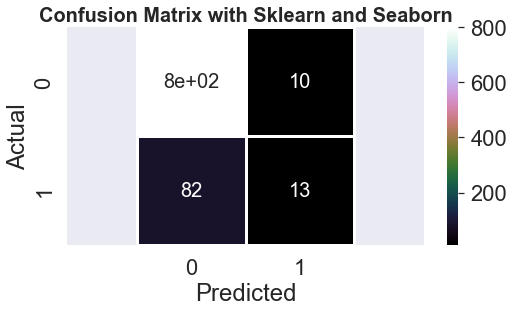

In [61]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(8,4))
    sns.set(font_scale=2)
    sns.heatmap(cf, annot = True, square=True, annot_kws={'size':20}, linewidth=3, cmap='cubehelix')
    plt.xlabel('Predicted');
    plt.ylabel('Actual')
    plt.axis('equal');
    plt.title('Confusion Matrix with Sklearn and Seaborn', fontweight='bold', fontsize=20)
    plt.show()

In [62]:
# CLASSIFICATION REPORT
print(classification_report(yts, pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       810
           1       0.57      0.14      0.22        95

    accuracy                           0.90       905
   macro avg       0.74      0.56      0.58       905
weighted avg       0.87      0.90      0.87       905



In [63]:
accuracy_score(yts, pred)

0.8983425414364641

In [67]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    sv = SVC(kernel = kernel).fit(xtr, ytr)
    pred = sv.predict(xts)
    print("Accuracy: ("+kernel+")", accuracy_score(yts,pred))

Accuracy: (linear) 0.8950276243093923
Accuracy: (rbf) 0.8994475138121547
Accuracy: (poly) 0.8983425414364641


In [68]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
    sv = SVC(kernel = 'rbf', gamma = gamma).fit(xtr,ytr)
    pred = sv.predict(xts)
    print("Accuracy:(", gamma, "):", accuracy_score(yts, pred))

Accuracy:( 0.1 ): 0.9005524861878453
Accuracy:( 1 ): 0.8928176795580111
Accuracy:( 10 ): 0.8939226519337017
Accuracy:( 100 ): 0.8939226519337017


In [69]:
degrees = [0, 1, 2, 3, 4, 5, 20]
for degree in degrees:
    sv = SVC(kernel = 'poly', degree = degree).fit(xtr,ytr)
    pred = sv.predict(xts)
    print("Accuracy:(", degree, "):", accuracy_score(yts, pred))

Accuracy:( 0 ): 0.8950276243093923
Accuracy:( 1 ): 0.8950276243093923
Accuracy:( 2 ): 0.8972375690607735
Accuracy:( 3 ): 0.8983425414364641
Accuracy:( 4 ): 0.8994475138121547
Accuracy:( 5 ): 0.8961325966850828
Accuracy:( 20 ): 0.8718232044198895
